# FORECASTING THE TREND OF THE COVID-19 VIRUS IN INDIA!

In [1]:
#importing essential modules and packages
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
#importing the data
dataset = pd.read_csv('nation_level_daily.csv')

In [3]:
#printing the head of the data
dataset.head()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
0,30-Jan,1,0,0,1,0,0
1,31-Jan,1,0,0,0,0,0
2,01-Feb,1,0,0,0,0,0
3,02-Feb,2,0,0,1,0,0
4,03-Feb,3,0,0,1,0,0


## Data Preprocessing!

In [4]:
#converting the strings in the date column to a desired form
for i in range (len(dataset['date'].values)):
    dataset['date'][i] = dataset['date'][i][:2]+'-'+dataset['date'][i][3:6] + '-2020'
dataset.head()

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
0,30-Jan-2020,1,0,0,1,0,0
1,31-Jan-2020,1,0,0,0,0,0
2,01-Feb-2020,1,0,0,0,0,0
3,02-Feb-2020,2,0,0,1,0,0
4,03-Feb-2020,3,0,0,1,0,0


In [5]:
#converting the date column to date time type
from datetime import datetime
for i in range (len(dataset['date'].values)):
    dataset['date'][i] = datetime.strptime(dataset['date'][i], '%d-%b-%Y')
dataset.head()

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
0,2020-01-30 00:00:00,1,0,0,1,0,0
1,2020-01-31 00:00:00,1,0,0,0,0,0
2,2020-02-01 00:00:00,1,0,0,0,0,0
3,2020-02-02 00:00:00,2,0,0,1,0,0
4,2020-02-03 00:00:00,3,0,0,1,0,0


In [6]:
#dropping columns with useless data
dataset.drop(['dailyconfirmed','dailydeceased','dailyrecovered'], axis = 1, inplace = True)

In [7]:
# setting the date column to the index of the data frame
df = dataset.set_index('date')
df.head()

,totalconfirmed,totaldeceased,totalrecovered
date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,1,0,0
2020-02-02,2,0,0
2020-02-03,3,0,0


In [8]:
#checking the shape of the data frame
df.shape

(133, 3)

## Data Visualization!

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


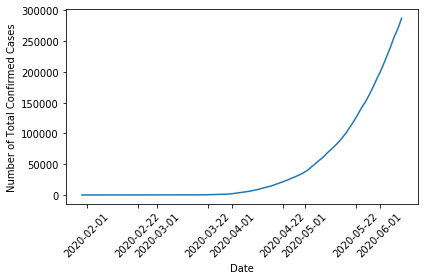

In [9]:
#Visualizing Total Confirmed Cases
plt.xlabel('Date')
plt.ylabel('Number of Total Confirmed Cases')
plt.plot(df['totalconfirmed'])
plt.xticks(rotation=45)
plt.tight_layout()

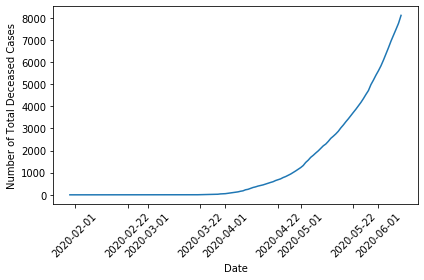

In [10]:
#visualizing the total deceased cases
plt.xlabel('Date')
plt.ylabel('Number of Total Deceased Cases')
plt.plot(df['totaldeceased'])
plt.xticks(rotation=45)
plt.tight_layout()

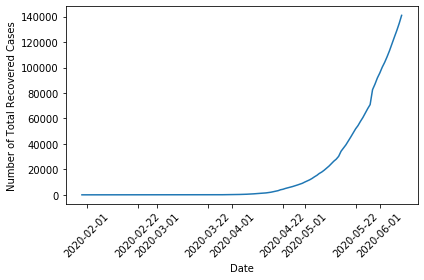

In [11]:
#visualizing the total recovered cases
plt.xlabel('Date')
plt.ylabel('Number of Total Recovered Cases')
plt.plot(df['totalrecovered'])
plt.xticks(rotation=45)
plt.tight_layout()

In [12]:
#creating seperate datas to work with
df_conf = df.loc[:,'totalconfirmed']
df_dec = df.loc[:,'totaldeceased']
df_rec = df.loc[:,'totalrecovered']

# Working with Total Number of Confirmed Cases!

In [13]:
# Finding the rolling mean and standard deviation

rolmean = df_conf.rolling(window =10).mean()

rolstd = df_conf.rolling(window = 10).std()

print(rolmean,rolstd)

date
2020-01-30         NaN
2020-01-31         NaN
2020-02-01         NaN
2020-02-02         NaN
2020-02-03         NaN
                ...   
2020-06-06    204331.9
2020-06-07    213544.6
2020-06-08    222797.1
2020-06-09    232211.1
2020-06-10    241861.8
Name: totalconfirmed, Length: 133, dtype: float64 date
2020-01-30             NaN
2020-01-31             NaN
2020-02-01             NaN
2020-02-02             NaN
2020-02-03             NaN
                  ...     
2020-06-06    27216.246163
2020-06-07    28134.725958
2020-06-08    28708.999508
2020-06-09    29223.902559
2020-06-10    29900.765694
Name: totalconfirmed, Length: 133, dtype: float64


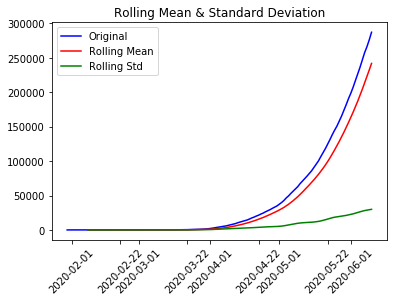

In [14]:
# visualizing the rolling mean and standard deviation with the original data
orig = plt.plot(df_conf, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(rotation = 45)
plt.show(block = False)

### Hence, by visualizing the above graph we can see that the data has no stationarity. Hence, we can use Time Series Analysis to predict the future.

(array([737456., 737477., 737485., 737506., 737516., 737537., 737546.,
        737567., 737577.]), <a list of 9 Text xticklabel objects>)

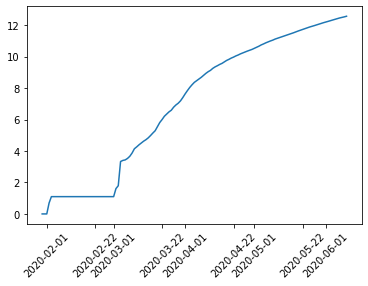

In [15]:
#converting the given data to log scale to introduce stationarity
df_conf_log = np.log(df_conf)
plt.plot(df_conf_log)
plt.xticks(rotation = 45)

(array([737456., 737477., 737485., 737506., 737516., 737537., 737546.,
        737567., 737577.]), <a list of 9 Text xticklabel objects>)

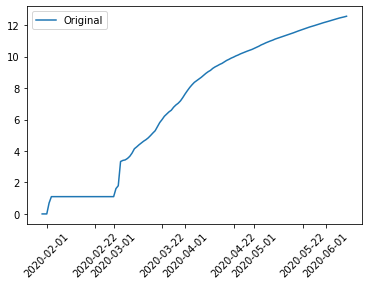

In [16]:
#finding and visualizing the trend, seasonality and residual of the data
from statsmodels.tsa.seasonal import seasonal_decompose
dec_conf = seasonal_decompose(df_conf_log)

trend = dec_conf.trend
seasonal = dec_conf.seasonal
residual = dec_conf.resid

plt.plot(df_conf_log, label = 'Original')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

(array([737456., 737470., 737485., 737499., 737516., 737530., 737546.,
        737560., 737577.]), <a list of 9 Text xticklabel objects>)

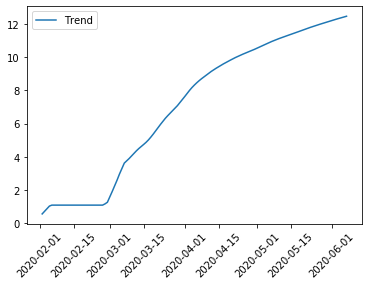

In [17]:
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

(array([737456., 737477., 737485., 737506., 737516., 737537., 737546.,
        737567., 737577.]), <a list of 9 Text xticklabel objects>)

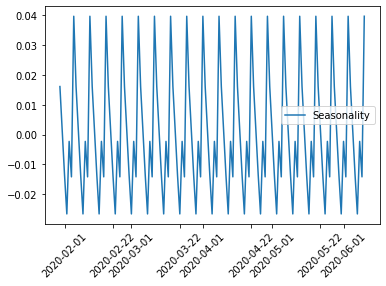

In [18]:
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

(array([737456., 737470., 737485., 737499., 737516., 737530., 737546.,
        737560., 737577.]), <a list of 9 Text xticklabel objects>)

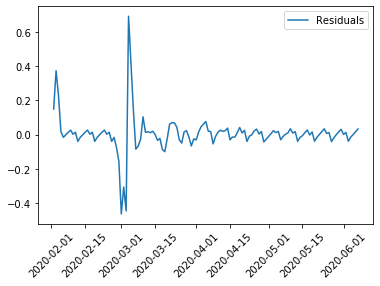

In [19]:
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

# Using the ARIMA model to make predictions for the future!

In [20]:
#finding the values of q, p and d using acf and pacf graphs
from statsmodels.tsa.stattools import acf, pacf

df_conf_diff_shift = df_conf_log - df_conf_log.shift()
df_conf_diff_shift.dropna(inplace =True)

lag_acf = acf(df_conf_diff_shift, nlags = 20)
lag_pacf = pacf(df_conf_diff_shift, nlags = 20,method='ols')

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

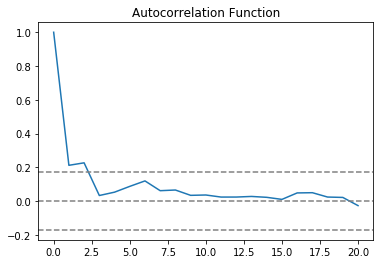

In [21]:
#Visualizing Autocorrelation Graph
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df_conf_diff_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_conf_diff_shift)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

### From the above graph, we find that it approaches zero for the first time when x = 15. Hence, q = 15

Text(0.5, 1.0, 'Partial Autocorrelation Function')

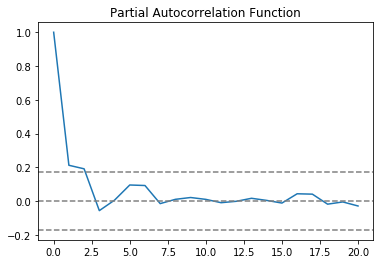

In [22]:
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df_conf_diff_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_conf_diff_shift)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')

### From the above graph, we find that it approaches zero when x is near about 2. Hence, p = 2.

### Now we have, q = 15, p = 2 and d = 1.

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Plotting ARIMA Model


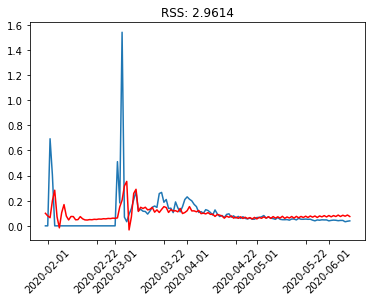

In [23]:
#fitting the data to the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

m_conf = ARIMA(df_conf_log, order = (15,1,2))
r_conf = m_conf.fit(disp=-1)
plt.plot(df_conf_diff_shift)
plt.plot(r_conf.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((r_conf.fittedvalues-df_conf_diff_shift)**2))
plt.xticks(rotation =45)
print('Plotting ARIMA Model')

In [24]:
#making predictions using ARIMA model
pred_confARIMA_diff = pd.Series(r_conf.fittedvalues, copy =True)
pred_confARIMA_diff.head()

date
2020-01-31    0.099887
2020-02-01    0.079043
2020-02-02    0.064598
2020-02-03    0.199302
2020-02-04    0.283505
dtype: float64

In [25]:
pred_confARIMA_cumsum = pred_confARIMA_diff.cumsum()

In [26]:
pred_confARIMA_log = pd.Series(df_conf_log.ix[0], index = df_conf_log.index)
pred_confARIMA_log = pred_confARIMA_log.add(pred_confARIMA_cumsum, fill_value = 0)
pred_confARIMA_log.head()

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2020-01-30    0.000000
2020-01-31    0.099887
2020-02-01    0.178929
2020-02-02    0.243528
2020-02-03    0.442829
dtype: float64

(array([737456., 737477., 737485., 737506., 737516., 737537., 737546.,
        737567., 737577.]), <a list of 9 Text xticklabel objects>)

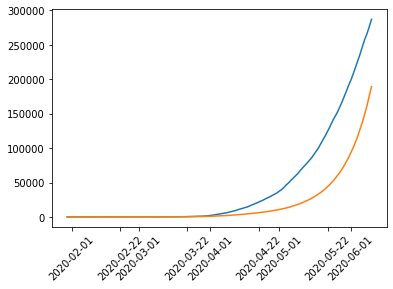

In [27]:
pred_conf = np.exp(pred_confARIMA_log)
plt.plot(df_conf)
plt.plot(pred_conf)
plt.xticks(rotation = 45)

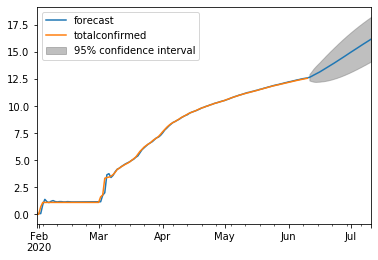

In [28]:
#visualizing the trend of forecast of the total cases on a logarithmic scale
r_conf.plot_predict(1,163)
x = r_conf.forecast(steps = 30)

### The blue line is the forecast. While, the grey shaded area represents the 95% confidence limit!

### Similarly we can make predictions for Total Deceased and Recovered Cases respectively.

# Working with the Total Number of Deceased Cases!

In [29]:

rolmean = df_dec.rolling(window =10).mean()

rolstd = df_dec.rolling(window = 10).std()

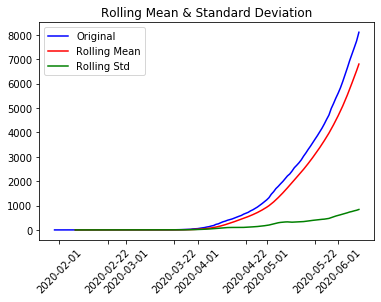

In [30]:
# visualizing the rolling mean and standard deviation with the original data
orig = plt.plot(df_dec, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(rotation = 45)
plt.show(block = False)

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([737499., 737516., 737530., 737546., 737560., 737577.]),
 <a list of 6 Text xticklabel objects>)

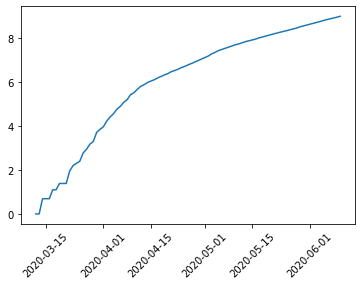

In [31]:
df_dec_log = np.log(df_dec)
plt.plot(df_dec_log)
plt.xticks(rotation = 45)

In [32]:
df_dec_log = df_dec_log['2020-03-12':]
df_dec_log

date
2020-03-12    0.000000
2020-03-13    0.000000
2020-03-14    0.693147
2020-03-15    0.693147
2020-03-16    0.693147
                ...   
2020-06-06    8.845777
2020-06-07    8.882669
2020-06-08    8.919587
2020-06-09    8.955319
2020-06-10    9.000360
Name: totaldeceased, Length: 91, dtype: float64

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_dec = seasonal_decompose(df_dec_log)

trend = dec_dec.trend
seasonal = dec_dec.seasonal
residual = dec_dec.resid

(array([737499., 737516., 737530., 737546., 737560., 737577.]),
 <a list of 6 Text xticklabel objects>)

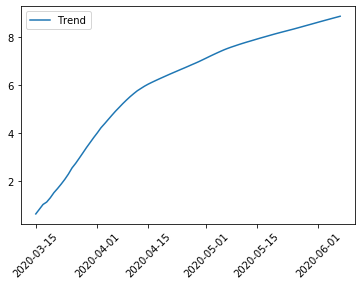

In [34]:
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

(array([737499., 737516., 737530., 737546., 737560., 737577.]),
 <a list of 6 Text xticklabel objects>)

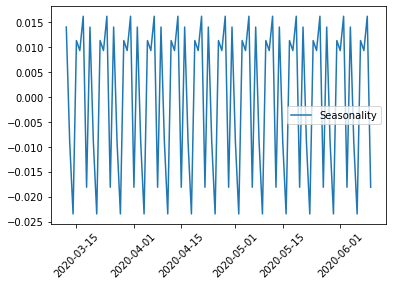

In [35]:
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

(array([737499., 737516., 737530., 737546., 737560., 737577.]),
 <a list of 6 Text xticklabel objects>)

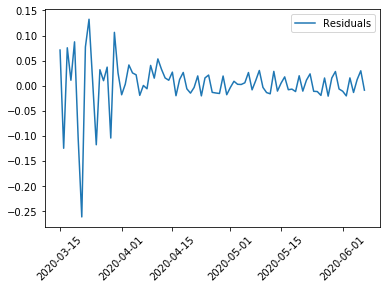

In [36]:
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

In [37]:
from statsmodels.tsa.stattools import acf, pacf

df_dec_diff_shift = df_dec_log - df_dec_log.shift()
df_dec_diff_shift.dropna(inplace =True)

lag_acf = acf(df_dec_diff_shift, nlags = 20)
lag_pacf = pacf(df_dec_diff_shift, nlags = 20,method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

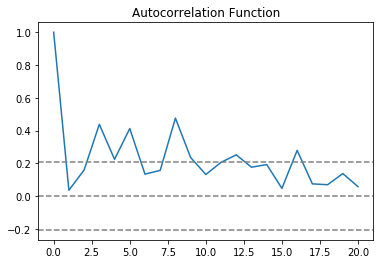

In [38]:
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df_dec_diff_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_dec_diff_shift)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

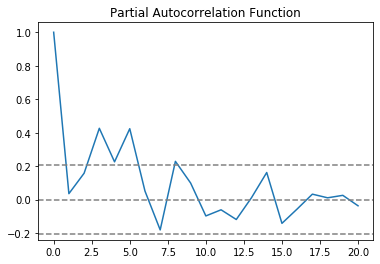

In [39]:
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df_dec_diff_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_dec_diff_shift)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


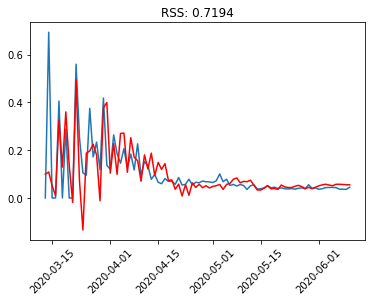

In [40]:
m_dec = ARIMA(df_dec_log, order = (15,1,2))
r_dec = m_dec.fit(disp=-1)
plt.plot(df_dec_diff_shift)
plt.plot(r_dec.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((r_dec.fittedvalues-df_dec_diff_shift)**2))
plt.xticks(rotation =45)
print('Plotting ARIMA Model')

In [41]:
pred_decARIMA_diff = pd.Series(r_dec.fittedvalues, copy =True)
pred_decARIMA_diff.head()

date
2020-03-13    0.099592
2020-03-14    0.108759
2020-03-15    0.051103
2020-03-16    0.009844
2020-03-17    0.325612
dtype: float64

In [42]:
pred_decARIMA_cumsum = pred_decARIMA_diff.cumsum()

In [43]:
pred_decARIMA_log = pd.Series(df_dec_log.ix[0], index = df_dec_log.index)
pred_decARIMA_log = pred_decARIMA_log.add(pred_decARIMA_cumsum, fill_value = 0)
pred_decARIMA_log.head()

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2020-03-12    0.000000
2020-03-13    0.099592
2020-03-14    0.208351
2020-03-15    0.259454
2020-03-16    0.269297
dtype: float64

(array([737456., 737477., 737485., 737506., 737516., 737537., 737546.,
        737567., 737577.]), <a list of 9 Text xticklabel objects>)

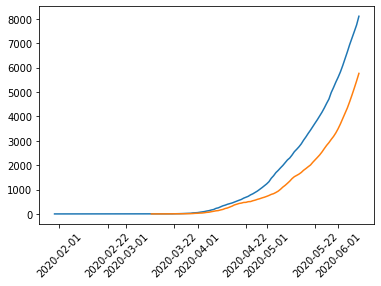

In [44]:
pred_dec = np.exp(pred_decARIMA_log)
plt.plot(df_dec)
plt.plot(pred_dec)
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Forecast for Total Deceased Cases')

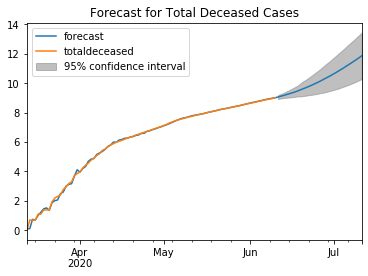

In [45]:
r_dec.plot_predict(1,121)
x = r_dec.forecast(steps = 30)
plt.title("Forecast for Total Deceased Cases")

# Working with Total Number of Recovered Cases!

In [46]:
rolmean = df_rec.rolling(window =10).mean()

rolstd = df_rec.rolling(window = 10).std()

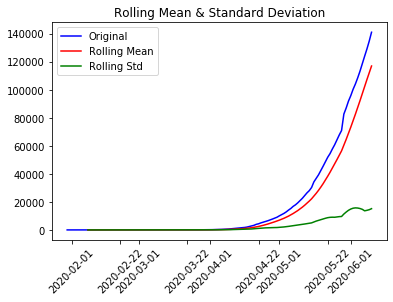

In [47]:
orig = plt.plot(df_rec, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(rotation = 45)
plt.show(block = False)

(array([737470., 737485., 737499., 737516., 737530., 737546., 737560.,
        737577., 737591.]), <a list of 9 Text xticklabel objects>)

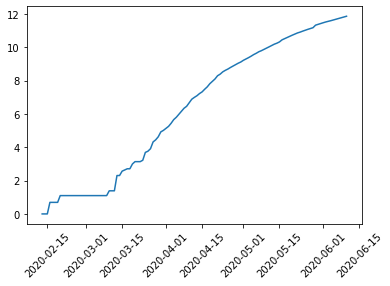

In [48]:
df_rec_log = np.log(df_rec)
plt.plot(df_rec_log)
plt.xticks(rotation = 45)

In [49]:
df_rec_log = df_rec_log['2020-02-13':]
df_rec_log

date
2020-02-13     0.000000
2020-02-14     0.000000
2020-02-15     0.000000
2020-02-16     0.693147
2020-02-17     0.693147
                ...    
2020-06-06    11.683992
2020-06-07    11.726810
2020-06-08    11.767715
2020-06-09    11.810456
2020-06-10    11.856366
Name: totalrecovered, Length: 119, dtype: float64

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_rec = seasonal_decompose(df_rec_log)

trend = dec_rec.trend
seasonal = dec_rec.seasonal
residual = dec_rec.resid

(array([737470., 737485., 737499., 737516., 737530., 737546., 737560.,
        737577.]), <a list of 8 Text xticklabel objects>)

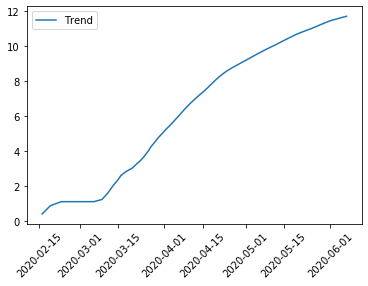

In [51]:
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

(array([737470., 737485., 737499., 737516., 737530., 737546., 737560.,
        737577., 737591.]), <a list of 9 Text xticklabel objects>)

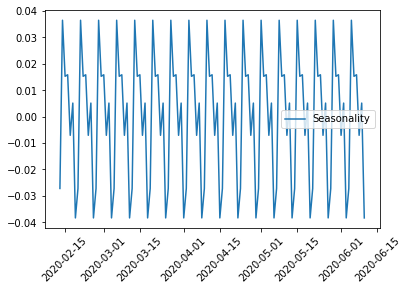

In [52]:
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

(array([737470., 737485., 737499., 737516., 737530., 737546., 737560.,
        737577.]), <a list of 8 Text xticklabel objects>)

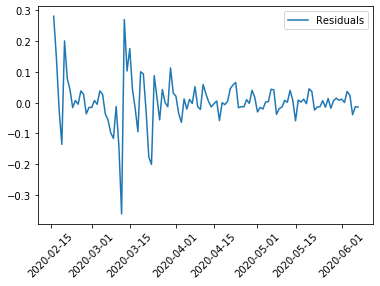

In [53]:
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.xticks(rotation =45)

In [54]:
from statsmodels.tsa.stattools import acf, pacf

df_rec_diff_shift = df_rec_log - df_rec_log.shift()
df_rec_diff_shift.dropna(inplace =True)

lag_acf = acf(df_rec_diff_shift, nlags = 20)
lag_pacf = pacf(df_rec_diff_shift, nlags = 20,method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

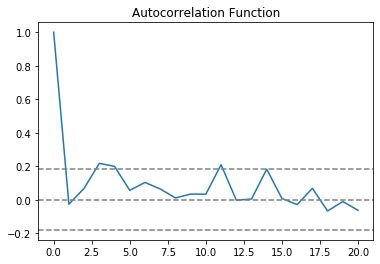

In [55]:
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df_rec_diff_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_rec_diff_shift)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Autocorrelation Function')

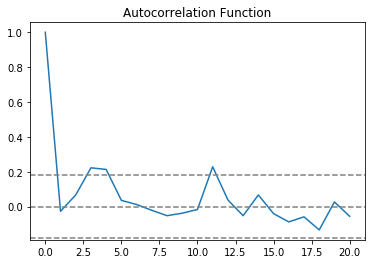

In [56]:
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df_rec_diff_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df_rec_diff_shift)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


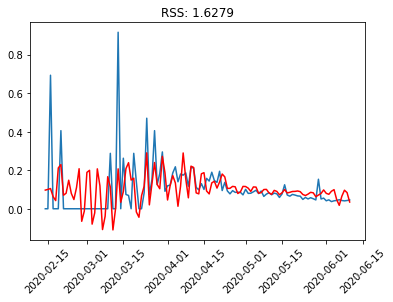

In [57]:
m_rec = ARIMA(df_rec_log, order = (15,1,2))
r_rec = m_rec.fit(disp=-1)
plt.plot(df_rec_diff_shift)
plt.plot(r_rec.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((r_rec.fittedvalues-df_rec_diff_shift)**2))
plt.xticks(rotation =45)
print('Plotting ARIMA Model')

In [58]:
pred_recARIMA_diff = pd.Series(r_rec.fittedvalues, copy =True)
pred_recARIMA_diff.head()

date
2020-02-14    0.096778
2020-02-15    0.100291
2020-02-16    0.104948
2020-02-17    0.063069
2020-02-18    0.042336
dtype: float64

In [59]:
pred_recARIMA_cumsum = pred_recARIMA_diff.cumsum()

In [60]:
pred_recARIMA_log = pd.Series(df_rec_log.ix[0], index = df_rec_log.index)
pred_recARIMA_log = pred_recARIMA_log.add(pred_recARIMA_cumsum, fill_value = 0)
pred_recARIMA_log.head()

C:\Users\Nikhil kr Parashar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2020-02-13    0.000000
2020-02-14    0.096778
2020-02-15    0.197069
2020-02-16    0.302017
2020-02-17    0.365086
dtype: float64

(array([737456., 737477., 737485., 737506., 737516., 737537., 737546.,
        737567., 737577.]), <a list of 9 Text xticklabel objects>)

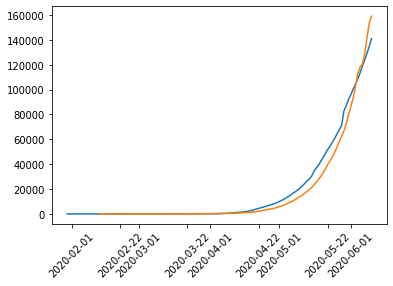

In [61]:
pred_rec = np.exp(pred_recARIMA_log)
plt.plot(df_rec)
plt.plot(pred_rec)
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Forecast for Total Recovered Cases')

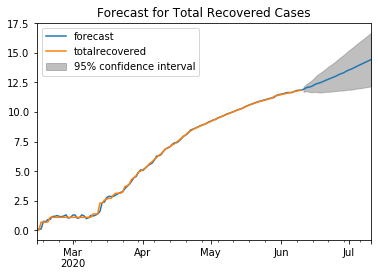

In [62]:
r_rec.plot_predict(1,149)
x = r_rec.forecast(steps = 30)
plt.title("Forecast for Total Recovered Cases")

# THANK YOU!